In [47]:
import rawgpy
import time
import json
import urllib.request
from nt import listdir
from __future__ import division
import os
import re
from os import path
import pandas as pd
import numpy as np
import nltk
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import f1_score


pd.set_option('display.max_colwidth', 300)
meta = pd.read_csv("./gameClean-2.csv", sep = ',' , header = None)

meta.columns = ["id","name","description","genres"]
meta.head()

,id,name,description,genres
0,id,name,descr,genres
1,28310,0 day attack on earth,seven day determin fate human begin hightech tokyo rubbl vibrant new york ground halt citi light pari envelop dark despair join mankind struggl massiv invad converg world major citi battl set actual area modern metropolitan citi take flight one futurist aircraft help repel humong enemi stage cov...,['Shooter']
2,386925,0 hour meltdown,built hour game jam power plant meltdown turn everyth tri stop meltdown timer,['Puzzle']
3,379914,0 robert blaster391 arnold,puzzl platform start control visionmad hour ludum dare game jam theme start noth,['Puzzle']
4,382343,0 skies,titl sky base thethem start noth minut joy object assembl plane whilst rout runway fli aimfor finish checkpoint bts experi first particip start finish compo extend jam tri make minim game playdur slight intens keep easi simpler complic achiev boredom sooner expectedthi result look forward critiq...,['Adventure']


In [48]:
games = pd.DataFrame(meta)
games.head()

,id,name,description,genres
0,id,name,descr,genres
1,28310,0 day attack on earth,seven day determin fate human begin hightech tokyo rubbl vibrant new york ground halt citi light pari envelop dark despair join mankind struggl massiv invad converg world major citi battl set actual area modern metropolitan citi take flight one futurist aircraft help repel humong enemi stage cov...,['Shooter']
2,386925,0 hour meltdown,built hour game jam power plant meltdown turn everyth tri stop meltdown timer,['Puzzle']
3,379914,0 robert blaster391 arnold,puzzl platform start control visionmad hour ludum dare game jam theme start noth,['Puzzle']
4,382343,0 skies,titl sky base thethem start noth minut joy object assembl plane whilst rout runway fli aimfor finish checkpoint bts experi first particip start finish compo extend jam tri make minim game playdur slight intens keep easi simpler complic achiev boredom sooner expectedthi result look forward critiq...,['Adventure']


In [49]:
genres = [] 
genres1 = [] 
s1= ['']
# extract genres
for i in games['genres']: 
    a = list(i.replace("]",'').replace('[','').replace("'",'').replace(' ','').split(","))
    if a == s1:
        genres.append(' ') 
    else:
        genres.append(a)
        genres1.append(a)

# add to 'movies' dataframe  
games['genre_new'] = genres
games.shape

(33708, 5)

In [50]:
games_new =  games[~(games['genre_new'] == ' ')]
games_new.head(1000)

,id,name,description,genres,genre_new
0,id,name,descr,genres,[genres]
1,28310,0 day attack on earth,seven day determin fate human begin hightech tokyo rubbl vibrant new york ground halt citi light pari envelop dark despair join mankind struggl massiv invad converg world major citi battl set actual area modern metropolitan citi take flight one futurist aircraft help repel humong enemi stage cov...,['Shooter'],[Shooter]
2,386925,0 hour meltdown,built hour game jam power plant meltdown turn everyth tri stop meltdown timer,['Puzzle'],[Puzzle]
3,379914,0 robert blaster391 arnold,puzzl platform start control visionmad hour ludum dare game jam theme start noth,['Puzzle'],[Puzzle]
4,382343,0 skies,titl sky base thethem start noth minut joy object assembl plane whilst rout runway fli aimfor finish checkpoint bts experi first particip start finish compo extend jam tri make minim game playdur slight intens keep easi simpler complic achiev boredom sooner expectedthi result look forward critiq...,['Adventure'],[Adventure]
...,...,...,...,...,...
995,384877,air and fire,air fire player enter symbiosi either element air fire air doubl jump fire shoot fire ball choos wise need proceed level fight boss end control movespacew jump usead shift dashleft mous enter sword shoot team maximilian zenz markus kohl,"['Adventure', 'Fighting']","[Adventure, Fighting]"
996,394012,air brigade 2 early test flight demo,game design oculus quest also need sideload game order play recommend use sidequest simpl test flight abl take endless badland terrain flight model use silantro flight simul toolkitiamput thisout therenowforthosethatwouldjust liketheopportunitytoflyaroundavirtualworldontheirquest pleas feel incl...,['Simulation'],[Simulation]
997,369336,air brigade,game design oculus quest also need sideload game order play recommend use sidequest take sky arcad air combat game test skill real player earn money play game unlock power dead aircraft featur plane unlock includ raptor fearsom termin play onlin player differ game mode includ team deathmatch bat...,['Simulation'],[Simulation]
998,355460,air cavalry flight simulator,peopl around world download air cavalri flight sim get cockpit advanc helicopt world includ black hawk mvb osprey chinook apach iroquoi cayus ahz cobra super stallion eurocopt tiger kiowa warrior hind black shark hip helicopt various region environ build fli skill experi enjoy infinit flight leg...,"['Simulation', 'Racing']","[Simulation, Racing]"


In [51]:
games_new.shape, games.shape
print(games_new.shape[0])

33708


In [52]:
all_genres = sum(genres1,[])


print(len(set(all_genres)))

14


In [53]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe

list1 = list(all_genres.values())
total = np.sum(list1, axis=0)
lista = []
for i in range(len(list1)):
    if type(list1[i]) == int:
        lista.append(round(list1[i]*100/total))

all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values()),
                              'Porcentage': list(lista)})

print(all_genres_df)


Genre  Count  Porcentage
0        genres      1         0.0
1       Shooter   3381         7.0
2        Puzzle   6730        14.0
3     Adventure   7679        16.0
4   Educational    831         2.0
5        Action  10817        22.0
6           RPG   4776        10.0
7    Simulation   4341         9.0
8      Fighting    893         2.0
9    BoardGames    922         2.0
10     Strategy   4254         9.0
11       Sports   1799         4.0
12       Racing   1575         3.0
13         Card    431         1.0


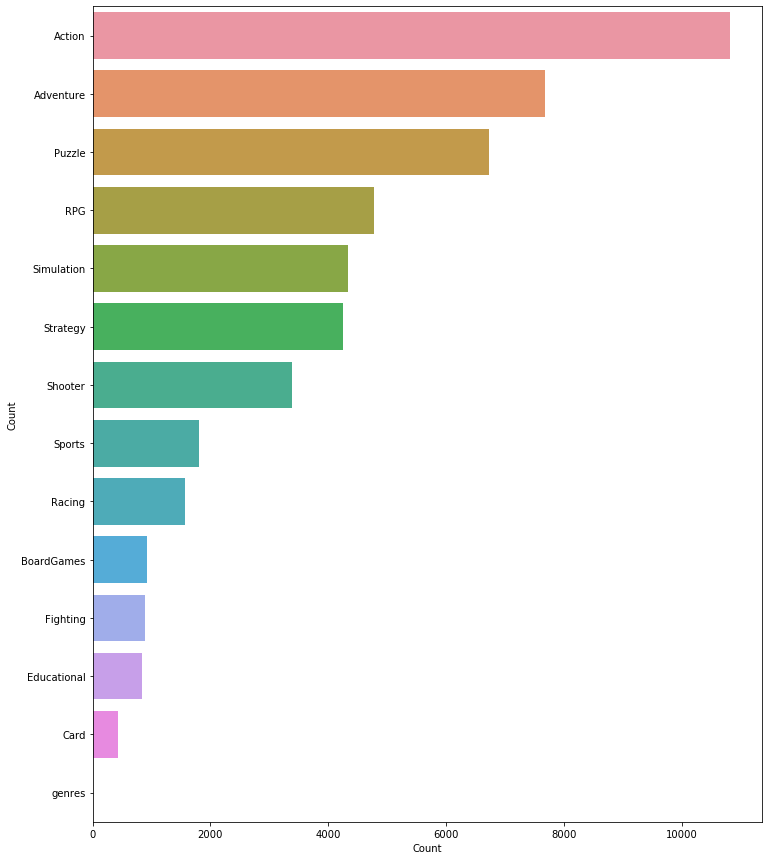

In [54]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [55]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.show()

In [56]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(games_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(games_new['genre_new'])

In [57]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [58]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(games_new['description'], y, test_size=0.2, random_state=9)

In [59]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [60]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [61]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [62]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [63]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
multilabel_binarizer.inverse_transform(y_pred)[3]

()

In [65]:
f1_score(yval, y_pred, average="micro")

0.5620643431635389

In [66]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [67]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [68]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.6402755696873345